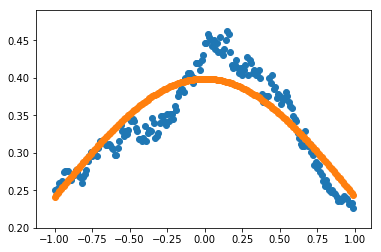

In [24]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.special import gamma

def find_radius (x, X, K):
    ''' Grows a sphere centered on x until K points from the data set X are included.
    Returns the radius of the resulting sphere.'''
    
    h = .001
    n = x.shape[0]
    radius = 0
    while True:
        num_points = 0
        for x_train in X:
            x_train = np.array(x_train)
            if la.norm (x - x_train) < radius:
                num_points += 1
        if num_points >= K:
            break
        radius += h
    
    return radius

def find_volume (x, X, K):
    ''' Computes the volume of the smallest sphere centered on x that includes K points
    from the data set X.'''
    
    n = len (x)
    radius = find_radius (x, X, K)
    volume = np.pi**(n/2) * radius ** n / gamma (1+n/2)
    return volume

    
def compute_probability (x, X, K):
    ''' Approximates the probability mass surrounding the point x by assuming a constant
    probability density in the sphere surrounding x.'''
    
    N = len (X)
    V = find_volume (x, X, K)
    p = K / (N*V)
    return p

def main(K):
    ''' Samples 1000 times from a normal distribution with mean 0 and variance 1. 
    Estimates the density using the nearest neighbors method. Plots the true distribution
    and its approximation.'''
    
    X = [np.random.normal() for time in range (1000)]
    x_test = np.arange(-1,1,.01)
    y_test = []
    y_gaussian = []
    for x in x_test:
        x = np.array([x])
        y_test.append (compute_probability (x, X, K))
        y_gaussian.append (1/(np.sqrt(2*np.pi)) * np.exp (-1/2*x**2))
    plt.scatter (x_test, y_test)
    plt.scatter (x_test, y_gaussian)
    plt.show()
    
main(100)